### Problem Statment

DDS is a startup company that is planning to start a shuttle service (pick-up and drop) at a discounted price. However, there are limited seats available and the company only wants to provide this service to the employees who are highly likely to buy the service for a long time.

You as a data scientist have to build to model to automate the task of identifying such employees using the data obtained from a survey conducted by the HR department.

### Dataset

1. Age: Age of the employee
1. Gender: Gender of employee
1. Engineer: Does the employee have Engineering Degree. 1 indicates the employee has an engineering degree 0 indicates the employee doesn't
1. MBA: Does the employee have MBA Degree. 1 indicates the employee has an MBA degree indicates the employee doesn't
1. Work Exp: Work experience in years
1. Salary: Annual Salary of employee (in thousand)
1. Distance: Distance from office (in KM)
1. License: Does the employee have a license
1. Opt_Service: Employee opts for the service or not. 1 indicates employee opts for the service 0 indicates employee doesn't

### Import the necessary packages

In [141]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
#To install xgboost library use - !pip install xgboost 
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

### Read the dataset

In [111]:
cars = pd.read_csv("./datasets/Cars-dataset.csv")
data = cars.copy()

### View the first and last 5 rows of the dataset

In [112]:
data.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Opt_service
0,28,Male,1,0,5,14.4,5.1,0,0
1,24,Male,1,0,6,10.6,6.1,0,0
2,27,Female,1,0,9,15.5,6.1,0,0
3,25,Male,0,0,1,7.6,6.3,0,0
4,25,Female,0,0,3,9.6,6.7,0,0


In [113]:
data.tail()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Opt_service
413,29,Male,1,1,8,13.9,17.1,0,0
414,25,Male,1,0,3,9.9,17.2,0,0
415,27,Female,0,0,4,13.9,17.3,0,0
416,26,Male,1,1,2,9.9,17.7,0,0
417,23,Male,0,0,3,9.9,17.9,0,0


### Understand the shape of the dataset

In [114]:
data.shape

(418, 9)

### Check the data types of the columns for the dataset

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          418 non-null    int64  
 1   Gender       418 non-null    object 
 2   Engineer     418 non-null    int64  
 3   MBA          418 non-null    int64  
 4   Work Exp     418 non-null    int64  
 5   Salary       418 non-null    float64
 6   Distance     418 non-null    float64
 7   license      418 non-null    int64  
 8   Opt_service  418 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 29.5+ KB


### Summary of the dataset

In [116]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,418.0,NaN,NaN,NaN,27.334928,4.153272,18.0,25.0,27.0,29.0,43.0
Gender,418,2,Male,297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engineer,418.0,NaN,NaN,NaN,0.748804,0.434221,0.0,0.25,1.0,1.0,1.0
MBA,418.0,NaN,NaN,NaN,0.260766,0.439578,0.0,0.0,0.0,1.0,1.0
Work Exp,418.0,NaN,NaN,NaN,5.873206,4.81611,0.0,3.0,5.0,8.0,24.0
Salary,418.0,NaN,NaN,NaN,15.418421,9.660234,6.5,9.625,13.0,14.9,57.0
Distance,418.0,NaN,NaN,NaN,11.30622,3.722143,3.2,8.6,10.9,13.575,23.4
license,418.0,NaN,NaN,NaN,0.205742,0.404727,0.0,0.0,0.0,0.0,1.0
Opt_service,418.0,NaN,NaN,NaN,0.083732,0.277317,0.0,0.0,0.0,0.0,1.0


### Check for missing values

In [117]:
data.isnull().sum()

Age            0
Gender         0
Engineer       0
MBA            0
Work Exp       0
Salary         0
Distance       0
license        0
Opt_service    0
dtype: int64

- There are no missing vaues in out dataset

In [118]:
replaceStruct = {
                "Gender":     {"Male": 0, "Female": 1}
}
data = data.replace(replaceStruct)

## EDA

### Bivariate Analysis

In [119]:
data.corr() >= 0.7

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Opt_service
Age,True,False,False,False,True,True,False,False,False
Gender,False,True,False,False,False,False,False,False,False
Engineer,False,False,True,False,False,False,False,False,False
MBA,False,False,False,True,False,False,False,False,False
Work Exp,True,False,False,False,True,True,False,False,True
Salary,True,False,False,False,True,True,False,False,True
Distance,False,False,False,False,False,False,True,False,False
license,False,False,False,False,False,False,False,True,False
Opt_service,False,False,False,False,True,True,False,False,True


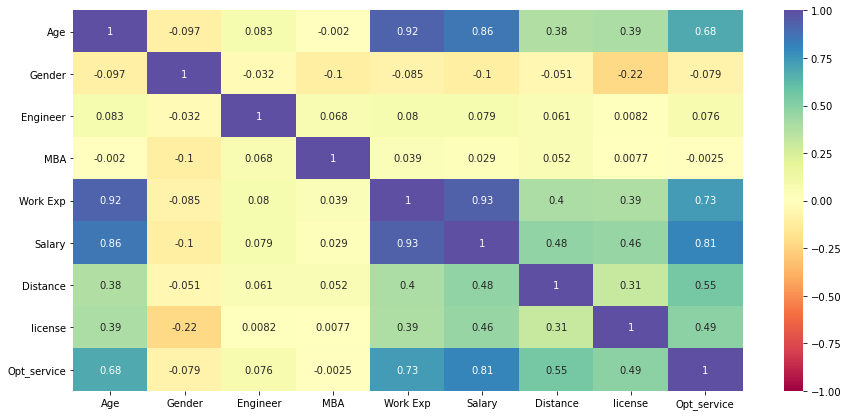

In [120]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

## Split the data into train and test sets

- When data (classification) exhibit a significant imbalance in the distribution of the target classes, it is good to use stratified sampling to ensure that relative class frequencies are approximately preserved in train and test sets.
- This is done by setting the stratify parameter to target variable in the train_test_split function.

In [121]:
X = data.drop("Opt_service" , axis=1)
y = data.pop("Opt_service")

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [123]:
y_test.value_counts(normalize=True)

0    0.912698
1    0.087302
Name: Opt_service, dtype: float64

**We will use the same functions, created in bagging hands-on lecture, to calculate different metrics and plot the confusion matrix.**

In [124]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [145]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    train_f1 = metrics.f1_score(y_train,pred_train)
    test_f1 = metrics.f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1 score on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1 score on test set : ",metrics.f1_score(y_test,pred_test))
    return score_list # returning the list with train and test scores

## Building the model
- We are going to build 3 ensemble models here - AdaBoost Classifier, Gradient Boosting Classifier and XGBoost Classifier.
- First, let's build these models with default parameters and then use hyperparameter tuning to optimize the model performance.
- We will calculate all three metrics - Accuracy, Precision and Recall but the metric of interest here is recall.
- `Recall` - It gives the ratio of True positives to Actual positives, so high Recall implies low false negatives, i.e. low chances of predicting a shuttle user as a non-shuttle user

### Bagging Classifier

In [126]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [127]:
bagging_estimator_score=get_metrics_score(bagging_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.9761904761904762
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  1.0
Precision on test set :  0.7857142857142857


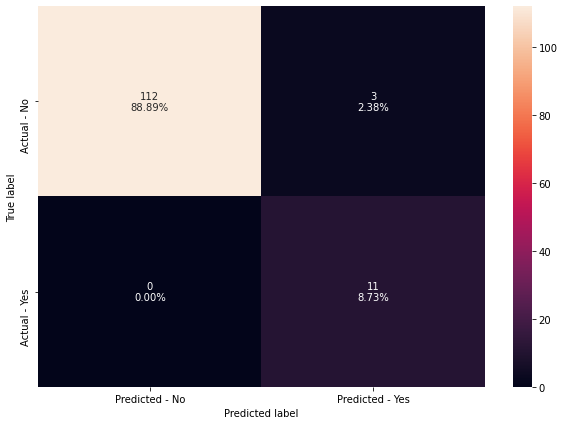

In [133]:
make_confusion_matrix(bagging_estimator,y_test)

### Random Forest Classifier

In [148]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [149]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_score=get_metrics_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  1.0
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  1.0
Precision on test set :  1.0
F1 score on training set :  1.0
F1 score on test set :  1.0


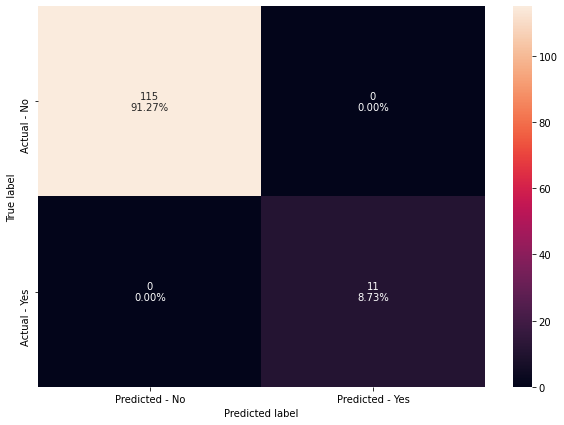

In [136]:
make_confusion_matrix(rf_estimator,y_test)

### Let's try using logistic regression as the base estimator for bagging classifier:

In [146]:
bagging_lr=BaggingClassifier(base_estimator=LogisticRegression(solver='liblinear',random_state=1,max_iter=1000),random_state=1)
bagging_lr.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000,
                                                    random_state=1,
                                                    solver='liblinear'),
                  random_state=1)

In [150]:
bagging_lr_score=get_metrics_score(bagging_lr)

Accuracy on training set :  0.9931506849315068
Accuracy on test set :  0.9920634920634921
Recall on training set :  0.9166666666666666
Recall on test set :  1.0
Precision on training set :  1.0
Precision on test set :  0.9166666666666666
F1 score on training set :  0.9565217391304348
F1 score on test set :  0.9565217391304348


### Bagging Hyperparameter Tuning

In [ ]:
# Choose the type of classifier. 
bagging_estimator_tuned1 = BaggingClassifier(random_state=1)

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Grid of parameters to choose from
## add from article
parameters1 = {'max_depth': [1]}

# Run the grid search
grid_obj1 = GridSearchCV(bagging_estimator_tuned1, parameters1, scoring=acc_scorer)
grid_obj1 = grid_obj.fit(X_train, y_train)

# Fit the best algorithm to the data.
bagging_estimator_tuned1.fit(X_train, y_train)

get_metrics_score(bagging_estimator_tuned1)

### AdaBoost Classifier

In [151]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [152]:
# Using above defined function to get accuracy, recall and precision on train and test set
abc_score=get_metrics_score(abc)

Accuracy on training set :  1.0
Accuracy on test set :  1.0
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  1.0
Precision on test set :  1.0
F1 score on training set :  1.0
F1 score on test set :  1.0


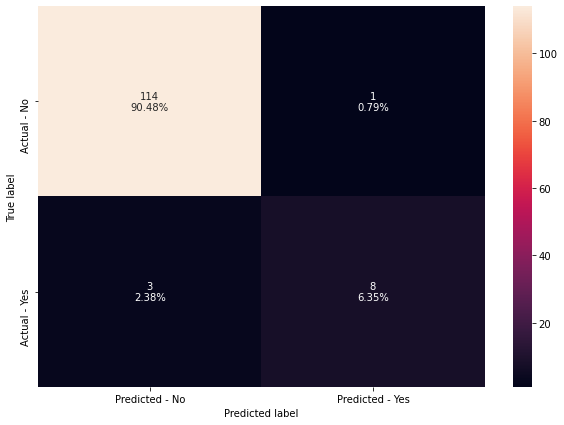

In [24]:
make_confusion_matrix(abc,y_test)

### Gradient Boosting Classifier

In [153]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [154]:
# Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  1.0
Accuracy on test set :  0.9920634920634921
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  1.0
Precision on test set :  0.9166666666666666
F1 score on training set :  1.0
F1 score on test set :  0.9565217391304348


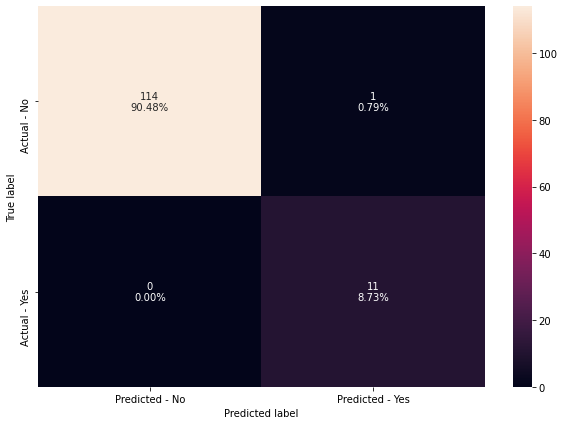

In [157]:
make_confusion_matrix(gbc,y_test)

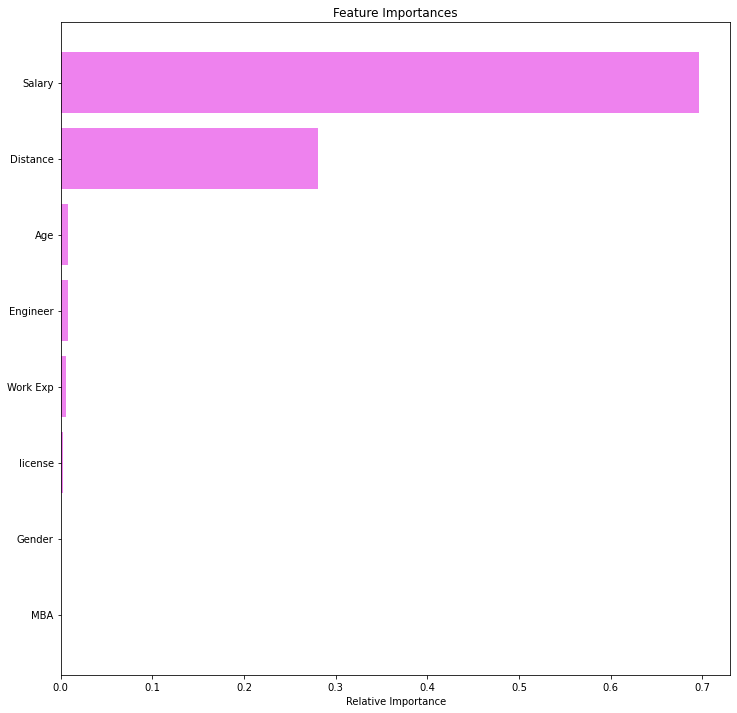

In [158]:
importances = gbc.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### XGBoost Classifier

In [155]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [156]:
# Using above defined function to get accuracy, recall and precision on train and test set
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  1.0
Accuracy on test set :  1.0
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  1.0
Precision on test set :  1.0
F1 score on training set :  1.0
F1 score on test set :  1.0


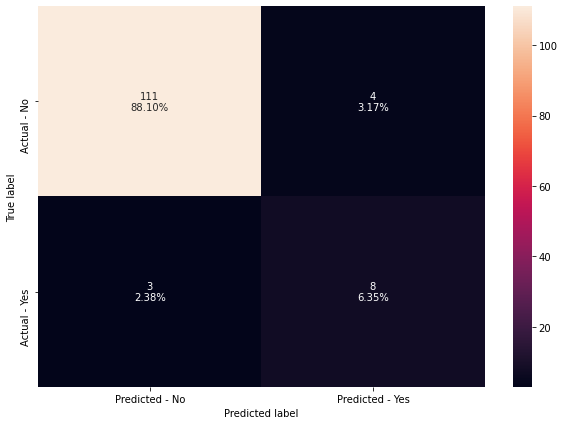

In [30]:
make_confusion_matrix(xgb,y_test)

## Hyperparameter Tuning

### AdaBoost Classifier

In [31]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),DecisionTreeClassifier(max_depth=2, random_state=1),DecisionTreeClassifier(max_depth=3, random_state=1)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   learning_rate=0.6, n_estimators=10, random_state=1)

In [32]:
# Using above defined function to get accuracy, recall and precision on train and test set
abc_tuned_score=get_metrics_score(abc_tuned)

Accuracy on training set :  1.0
Accuracy on test set :  0.9841269841269841
Recall on training set :  1.0
Recall on test set :  0.8181818181818182
Precision on training set :  1.0
Precision on test set :  1.0


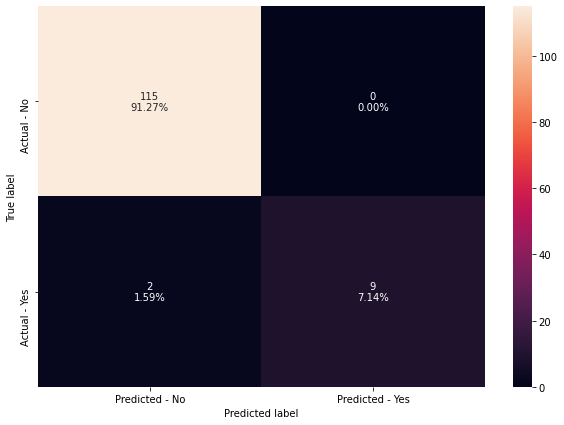

In [33]:
make_confusion_matrix(abc_tuned,y_test)

### Insights

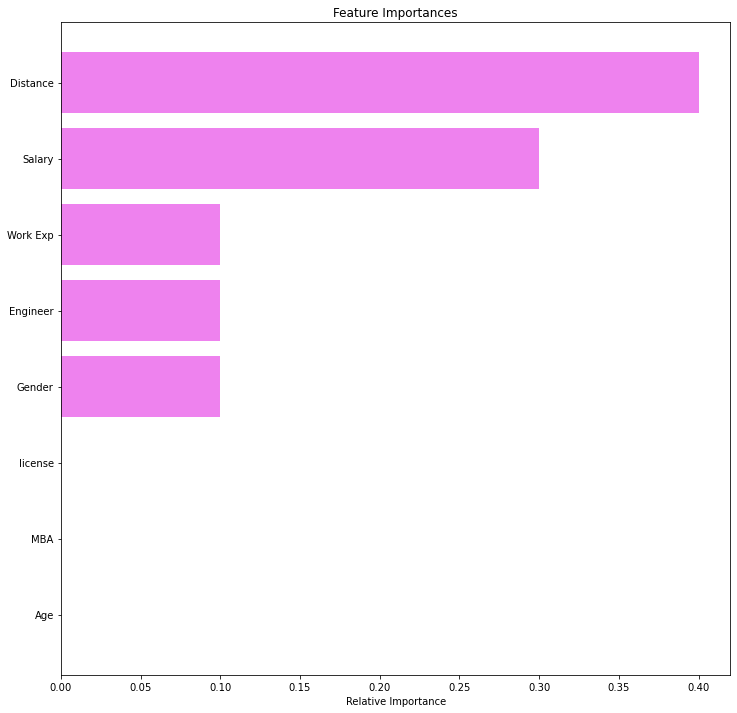

In [34]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Gradient Boosting Classifier

- Most of the hyperparameters available are same as random forest classifier.
- init: An estimator object that is used to compute the initial predictions. If ‘zero’, the initial raw predictions are set to zero. By default, a DummyEstimator predicting the classes priors is used.
- There is no class_weights parameter in gradient boosting.

**Let's try using AdaBoost classifier as the estimator for initial predictions**

In [35]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [36]:
# Using above defined function to get accuracy, recall and precision on train and test set
gbc_init_score=get_metrics_score(gbc_init)

Accuracy on training set :  1.0
Accuracy on test set :  0.9444444444444444
Recall on training set :  1.0
Recall on test set :  0.8181818181818182
Precision on training set :  1.0
Precision on test set :  0.6428571428571429


In [37]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, random_state=1, subsample=0.8)

In [38]:
# Using above defined function to get accuracy, recall and precision on train and test set
gbc_tuned_score=get_metrics_score(gbc_tuned)

Accuracy on training set :  1.0
Accuracy on test set :  0.9603174603174603
Recall on training set :  1.0
Recall on test set :  0.8181818181818182
Precision on training set :  1.0
Precision on test set :  0.75


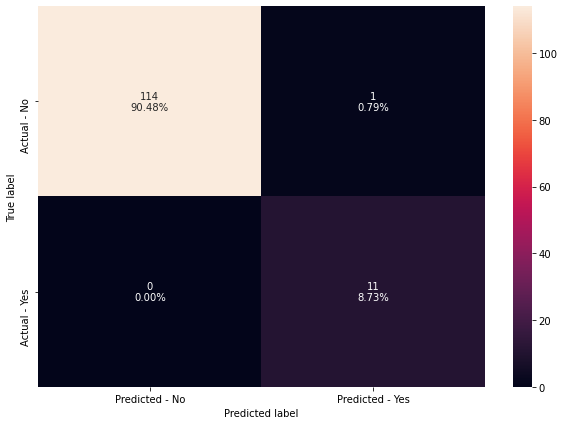

In [159]:
make_confusion_matrix(gbc_tuned,y_test)

In [166]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(random_state=1)

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Grid of parameters to choose from
parameters1 = {
    "n_estimators": [50],
    "learning_rate":[0.01]
}

# Run the grid search
grid_obj1 = GridSearchCV(gbc_tuned, parameters1, scoring=acc_scorer)
grid_obj1 = grid_obj1.fit(X_train, y_train)

grid_obj1_score=get_metrics_score(grid_obj1)

Accuracy on training set :  0.0
Accuracy on test set :  0.0
Recall on training set :  0.0
Recall on test set :  0.0
Precision on training set :  0.0
Precision on test set :  0.0
F1 score on training set :  0.0
F1 score on test set :  0.0


In [167]:
parameters2 = {
    "n_estimators": [100],
    "learning_rate":[0.01]
}

# Run the grid search
grid_obj2 = GridSearchCV(gbc_tuned, parameters2, scoring=acc_scorer)
grid_obj2 = grid_obj2.fit(X_train, y_train)

grid_obj2_score=get_metrics_score(grid_obj2)

Accuracy on training set :  0.9787234042553191
Accuracy on test set :  0.88
Recall on training set :  0.9583333333333334
Recall on test set :  1.0
Precision on training set :  1.0
Precision on test set :  0.7857142857142857
F1 score on training set :  0.9787234042553191
F1 score on test set :  0.88


In [168]:
parameters3 = {
    "n_estimators": [400],
    "learning_rate":[0.01]
}

# Run the grid search
grid_obj3 = GridSearchCV(gbc_tuned, parameters3, scoring=acc_scorer)
grid_obj3 = grid_obj3.fit(X_train, y_train)

grid_obj3_score=get_metrics_score(grid_obj3)

Accuracy on training set :  1.0
Accuracy on test set :  0.88
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  1.0
Precision on test set :  0.7857142857142857
F1 score on training set :  1.0
F1 score on test set :  0.88


### Insights

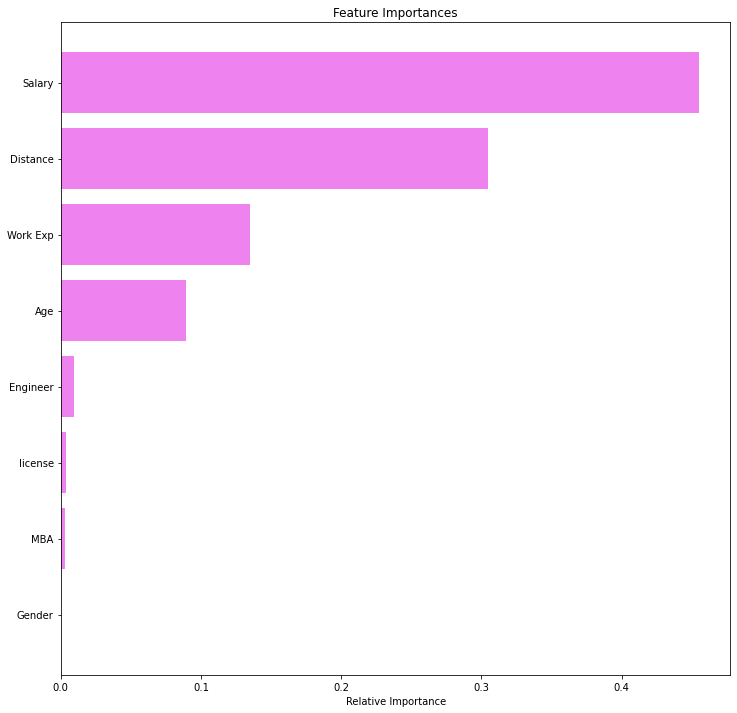

In [40]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### XGBoost Classifier

**XGBoost has many hyper parameters which can be tuned to increase the model performance. You can read about them in the xgboost documentation [here](https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters). Some of the important parameters are:**
- scale_pos_weight:Control the balance of positive and negative weights, useful for unbalanced classes. It has range from 0 to $\infty$.
- subsample: Corresponds to the fraction of observations (the rows) to subsample at each step. By default it is set to 1 meaning that we use all rows.
- colsample_bytree: Corresponds to the fraction of features (the columns) to use.
- colsample_bylevel: The subsample ratio of columns for each level. Columns are subsampled from the set of columns chosen for the current tree.
- colsample_bynode: The subsample ratio of columns for each node (split). Columns are subsampled from the set of columns chosen for the current level.
- max_depth: is the maximum number of nodes allowed from the root to the farthest leaf of a tree.
- learning_rate/eta: Makes the model more robust by shrinking the weights on each step.
- gamma: A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.

In [41]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=0.5, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=16,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=2, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [42]:
# Using above defined function to get accuracy, recall and precision on train and test set
xgb_tuned_score=get_metrics_score(xgb_tuned)

Accuracy on training set :  0.9931506849315068
Accuracy on test set :  0.9444444444444444
Recall on training set :  0.9583333333333334
Recall on test set :  0.8181818181818182
Precision on training set :  0.9583333333333334
Precision on test set :  0.6428571428571429


### Insights

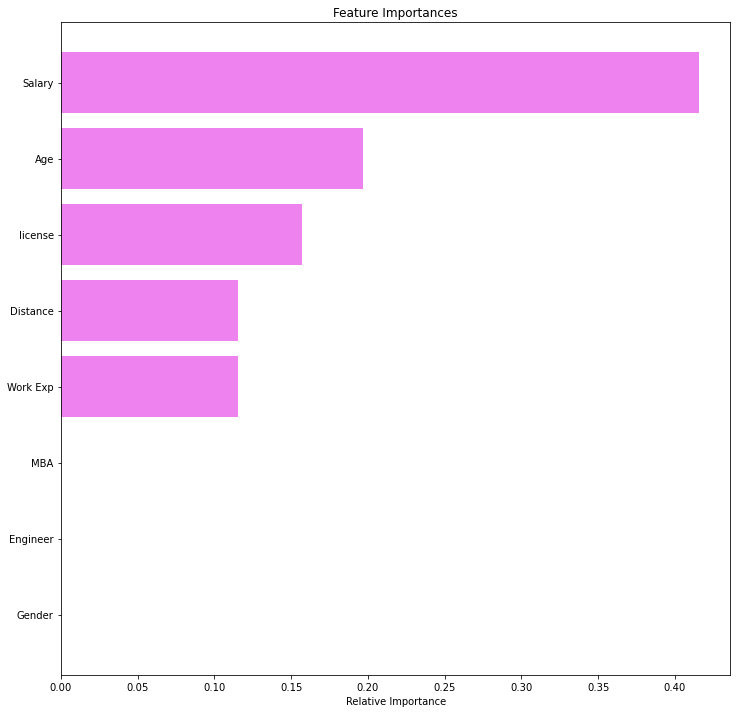

In [43]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Comparing all models

In [44]:
# defining list of models
models = [abc, abc_tuned, gbc, gbc_init, gbc_tuned, xgb, xgb_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))


comparison_frame = pd.DataFrame({'Model':['AdaBoost with default paramters','AdaBoost Tuned', 
                                          'Gradient Boosting with default parameters','Gradient Boosting with init=AdaBoost',
                                          'Gradient Boosting Tuned','XGBoost with default parameters','XGBoost Tuned'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,AdaBoost with default paramters,1.00,0.97,1.00,0.73,1.00,0.89
1,AdaBoost Tuned,1.00,0.98,1.00,0.82,1.00,1.00
2,Gradient Boosting with default parameters,1.00,0.96,1.00,0.91,1.00,0.71
3,Gradient Boosting with init=AdaBoost,1.00,0.94,1.00,0.82,1.00,0.64
4,Gradient Boosting Tuned,1.00,0.96,1.00,0.82,1.00,0.75
5,XGBoost with default parameters,1.00,0.94,1.00,0.73,1.00,0.67
6,XGBoost Tuned,0.99,0.94,0.96,0.82,0.96,0.64


In [59]:
X = data.drop("Opt_service" , axis=1)
y = data.pop("Opt_service")

KeyError: "['Opt_service'] not found in axis"

0    0.912698
1    0.087302
Name: Opt_service, dtype: float64